In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
country_df = pd.read_csv(r'C:\Users\Ashish\Desktop\machine learning\country.csv')

In [3]:
country_df.head()

,Country,Corruption_Index,Gini_Index
0,Hong Kong,77,53.7
1,South Korea,53,30.2
2,China,40,46.2
3,Italy,47,32.7
4,Mongolia,38,36.5


In [4]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           20 non-null     object 
 1   Corruption_Index  20 non-null     int64  
 2   Gini_Index        20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 612.0+ bytes


In [5]:
X = sm.add_constant(country_df['Gini_Index'])
Y = country_df['Corruption_Index']

In [6]:
X.head()

,const,Gini_Index
0,1.0,53.7
1,1.0,30.2
2,1.0,46.2
3,1.0,32.7
4,1.0,36.5


In [7]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size  =0.8, random_state = 42)

In [8]:
country_df_lm = sm.OLS(train_Y, train_X).fit()

In [9]:
print(country_df_lm.params)

const         148.375633
Gini_Index     -2.561817
dtype: float64


In [10]:
country_df_lm.summary()

C:\Users\Ashish\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Corruption_Index   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     15.24
Date:                Fri, 03 Jan 2025   Prob (F-statistic):            0.00159
Time:                        11:28:59   Log-Likelihood:                -65.555
No. Observations:                  16   AIC:                             135.1
Df Residuals:                      14   BIC:                             136.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        148.3756     22.245      6.670      0.000     100.664     196.087
Gini_Index    -2.5618      0.656     -3.904      0.002      -3.969      -1.154
==============================================================================
Omnibus:                        1.320   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                1.000
Skew:                           0.369   Prob(JB):                        0.606
Kurtosis:                       2.023   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 800x600 with 0 Axes>

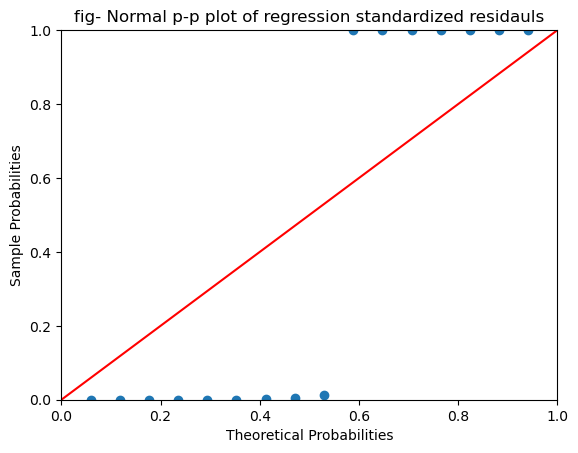

In [12]:
country_df_resid = country_df_lm.resid
probplot = sm.ProbPlot(country_df_resid)
plt.figure(figsize =(8,6))
probplot.ppplot(line = '45')
plt.title("fig- Normal p-p plot of regression standardized residauls")
plt.show()

In [13]:
def get_standardised_values(vals):
    return (vals- vals.mean())/vals.std()

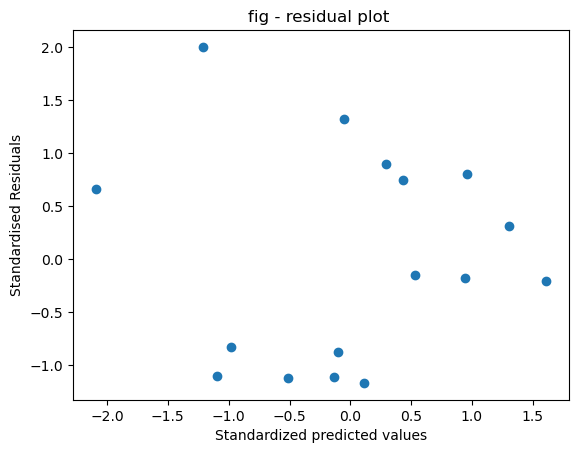

In [14]:
plt.scatter(get_standardised_values(country_df_lm.fittedvalues), get_standardised_values(country_df_resid))
plt.title("fig - residual plot ")
plt.xlabel("Standardized predicted values")
plt.ylabel("Standardised Residuals")
plt.show()

In [15]:
from scipy.stats import zscore

In [16]:
country_df['z_score_gini'] = zscore(country_df.Gini_Index)

In [17]:
country_df.head()

,Country,Corruption_Index,Gini_Index,z_score_gini
0,Hong Kong,77,53.7,2.634213
1,South Korea,53,30.2,-0.630766
2,China,40,46.2,1.592198
3,Italy,47,32.7,-0.283428
4,Mongolia,38,36.5,0.244526


In [19]:
import numpy as np

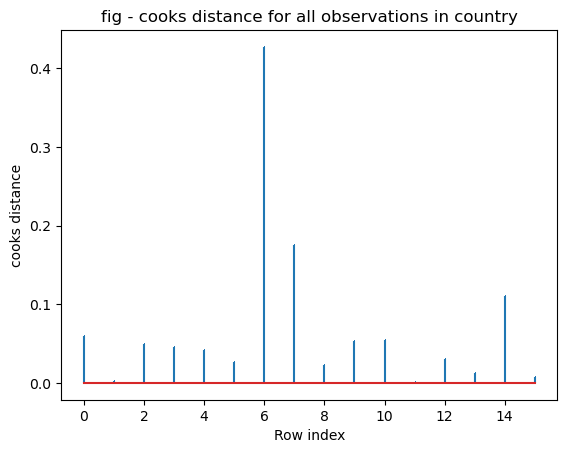

In [23]:
country_influence = country_df_lm.get_influence()
(c,p) = country_influence.cooks_distance
plt.stem(np.arange(len(train_X)), np.round(c,3), markerfmt = ",")
plt.title("fig - cooks distance for all observations in country")
plt.xlabel("Row index")
plt.ylabel("cooks distance")
plt.show()

In [25]:
from statsmodels.graphics.regressionplots import influence_plot

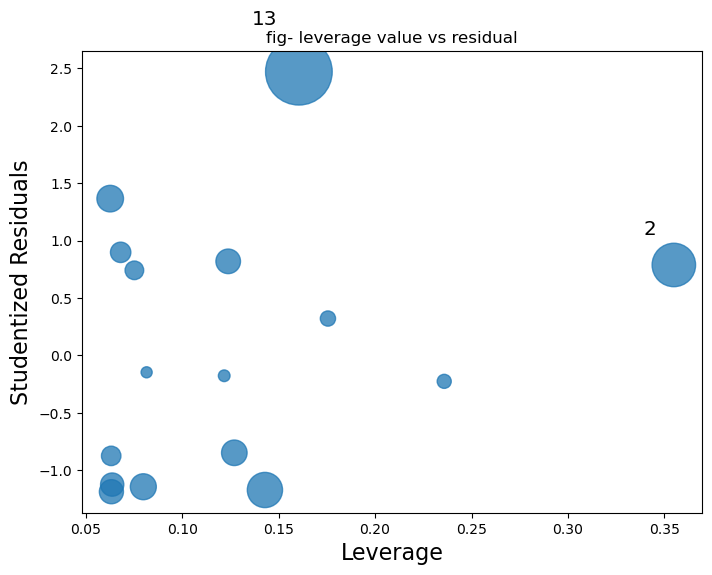

In [27]:
fig, ax = plt.subplots(figsize =(8,6))
influence_plot(country_df_lm, ax = ax)
plt.title("fig- leverage value vs residual")
plt.show()

In [29]:
pred_y= country_df_lm.predict(test_X)

In [31]:
pred_y

0     10.806075
17    38.986059
15    60.761501
1     71.008768
dtype: float64

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
np.abs(r2_score(test_Y, pred_y))

4.347394400679093

In [37]:
np.sqrt(mean_squared_error(test_Y, pred_y))

34.33803234534181

In [43]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [45]:
_, pred_y_low, pred_y_high = wls_prediction_std(country_df_lm,test_X, alpha = 0.1)
pred_y_df = pd.DataFrame({'Gini_Index_' : test_X['Gini_Index'], 'pred_y': pred_y, 'pred_y_left': pred_y_low, 'pred_y_high': pred_y_high})


In [49]:
pred_y_df.head()

,Gini_Index_,pred_y,pred_y_left,pred_y_high
0,53.7,10.806075,-25.942578,47.554728
17,42.7,38.986059,8.741681,69.230437
15,34.2,60.761501,32.486818,89.036185
1,30.2,71.008768,42.512869,99.504667
